# Create Eyetracking Heatmap

In [168]:
# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import image

In [70]:
# Set the variables

file = 'https://raw.githubusercontent.com/antovich/PyTrackingFinalProject/master/VSTM%20Data%20P18.txt'

stimCol = 'MediaName'

stimName = 'VSTM Green Yellow.jpg'

xCoordCol = 'GazePointX (MCSpx)'

yCoordCol = 'GazePointY (MCSpx)'

stimWidth = 1360

stimHeight = 768

origin = 'upper'

title = stimName

In [195]:
class heatmap():
    
    def __init__(self, data, kind = 'file'):
        self.data = self.load_data(file)
        self.subset = []
    
    def load_data(self, data, kind = 'file'):
        if kind == 'file':
            self.filetype = data[-3:]
            if self.filetype == 'csv':
                self.data = pd.read_csv(data)
            elif self.filetype == 'txt':
                self.data = pd.read_table(data)
            else:
                raise Exception("Error: unsupported file type, please convert to .csv or .txt")
        
        elif kind == 'pandasdataframe':
            self.data = data
        
        else:
            raise Exception("Error: please indicate data as file or pandasdataframe")
        
        return self.data
    
    def select_data(self, stimCol, stimName, xCoordCol, yCoordCol):
        # Subset the dataframe for only the specified stimulus
        self.subset = self.data.ix[self.data[stimCol] == stimName]
        
        # Remove nulls from columns of interest (leaving only instances with x and y coordinates)
        self.subset = self.subset[self.subset[xCoordCol].notnull()]
        self.subset = self.subset[self.subset[yCoordCol].notnull()]
        
        #return self.subset
    
    def draw_heatmap(self, stimWidth, stimHeight, xCoordCol, yCoordCol, xbins, ybins, title, 
                     origin = 'upper', transparent = 'no'):
        # pull the x and y coordinates
        x = self.subset[xCoordCol]
        y = self.subset[yCoordCol]

        # set the size of the plot to the dimensions of the stimulus
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=(xbins,ybins))
        
        extent = [1, stimWidth, 1, stimHeight]
        
        if transparent == 'no':

            # Plot heatmap
            plt.clf()
            plt.title(title)
            plt.ylabel('y')
            plt.xlabel('x')
            plt.imshow(heatmap, extent=extent, origin = origin)
            plt.show()
        
        elif transparent == 'yes':
            img = np.zeros((xbins,ybins,4))
        
            img[:,:,0] = heatmap/heatmap.max()
            img[:,:,1] = np.zeros_like(heatmap)
            img[:,:,2] = np.zeros_like(heatmap)
            img[:,:,3] = heatmap/heatmap.max()
            
            plt.imshow(img, extent=extent, origin= origin)
            plt.show()
        
        
        else:
            raise Exception("Error: please specify superimpose as yes or no")
        

In [190]:
test = heatmap(file, kind='file')

In [191]:
test.select_data(stimCol, stimName, xCoordCol, yCoordCol)

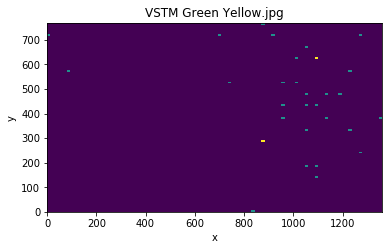

In [194]:
test.draw_heatmap(stimWidth, stimHeight, xCoordCol, yCoordCol, title = stimName, transparent = 'no', xbins=100, ybins=100)